<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# get matplot to show charts inline
%matplotlib inline

chrome://settings/content/cookies

NOTE: Make sure third party cookies are not blocked.

In [2]:
#from google.colab import files
#uploaded = files.upload()
#import io
df = pd.read_csv('../../../DATA/Employee-attrition.csv')


In [3]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [4]:
df.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


# Accessing the main DataFrame components

In [5]:
columns = df.columns
index = df.index
data = df.values

In [6]:
columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [7]:
index

RangeIndex(start=0, stop=49653, step=1)

In [8]:
data

array([[1318, '12/31/2006 0:00', '1/3/1954', ..., 2006, 'ACTIVE',
        'HEADOFFICE'],
       [1318, '12/31/2007 0:00', '1/3/1954', ..., 2007, 'ACTIVE',
        'HEADOFFICE'],
       [1318, '12/31/2008 0:00', '1/3/1954', ..., 2008, 'ACTIVE',
        'HEADOFFICE'],
       ...,
       [8279, '12/1/2015 0:00', '7/18/1994', ..., 2015, 'TERMINATED',
        'STORES'],
       [8296, '12/1/2013 0:00', '9/2/1994', ..., 2013, 'TERMINATED',
        'STORES'],
       [8321, '12/1/2014 0:00', '11/28/1994', ..., 2014, 'TERMINATED',
        'STORES']], dtype=object)

# 1. Understanding Data Types

#### 1.A Find Shape of Data Frame

In [9]:
df.shape

(49653, 18)

#### 1.B Find Data Tyeps of Data Frame

In [10]:
df.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

#### 1.C Find Number of Data Types in a Data Frame



```
Expected Output:
int64      5
object    13
dtype: int64
```



In [11]:
df.get_dtype_counts()

int64      5
object    13
dtype: int64

#### 1.D Use Info

Use info and explore difference.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
EmployeeID             49653 non-null int64
recorddate_key         49653 non-null object
birthdate_key          49653 non-null object
orighiredate_key       49653 non-null object
terminationdate_key    49653 non-null object
age                    49653 non-null int64
length_of_service      49653 non-null int64
city_name              49653 non-null object
department_name        49653 non-null object
job_title              49653 non-null object
store_name             49653 non-null int64
gender_short           49653 non-null object
gender_full            49653 non-null object
termreason_desc        49653 non-null object
termtype_desc          49653 non-null object
STATUS_YEAR            49653 non-null int64
STATUS                 49653 non-null object
BUSINESS_UNIT          49653 non-null object
dtypes: int64(5), object(13)
memory usage: 6.8+ MB


# 2. Selecting Column in Data Frame

#### 2.A Check Values of Job_Title column

In [13]:
df['job_title']

0                  CEO
1                  CEO
2                  CEO
3                  CEO
4                  CEO
5                  CEO
6                  CEO
7                  CEO
8                  CEO
9                  CEO
10           VP Stores
11           VP Stores
12           VP Stores
13           VP Stores
14           VP Stores
15           VP Stores
16           VP Stores
17           VP Stores
18           VP Stores
19           VP Stores
20       Legal Counsel
21       Legal Counsel
22       Legal Counsel
23       Legal Counsel
24       Legal Counsel
25       Legal Counsel
26       Legal Counsel
27       Legal Counsel
28       Legal Counsel
29       Legal Counsel
             ...      
49623          Cashier
49624          Cashier
49625          Cashier
49626          Cashier
49627          Cashier
49628          Cashier
49629          Cashier
49630          Cashier
49631          Cashier
49632          Cashier
49633          Cashier
49634          Cashier
49635      

#### 2.B Find How Many Rows Are in Each Job Title



```
# Expected Output
Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
.
.
.
```



In [14]:
job_title = df['job_title']
job_title.value_counts()

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Meats Manager                       285
Bakery Manager                      285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Investment Analyst                   20
Compensation Analyst                 20
Auditor                              20
Systems Analyst                      20
Corporate Lawyer                     17


#### 2.C [BONUS] Write A Function to Row Count



```
def row_count(column_name):
    number_of_rows = 0
    return number_of_rows
```



#### 2.D Describe 'Age'

Find count,  mean,  std, min, max of column 'age'

In [15]:
age = df['age']
age.describe()

count    49653.000000
mean        42.077035
std         12.427257
min         19.000000
25%         31.000000
50%         42.000000
75%         53.000000
max         65.000000
Name: age, dtype: float64

##### 2.E [BONUS] Describe 'All Numeric Columns of Data Frame

Find count, mean, std, min, max of of all columns of dataframe

In [16]:
df.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


# 3. Making The Index Meaningful

In [17]:
df.set_index("EmployeeID", inplace=True)

In [18]:
print(df.index)

Int64Index([1318, 1318, 1318, 1318, 1318, 1318, 1318, 1318, 1318, 1318,
            ...
            8188, 8214, 8223, 8226, 8231, 8258, 8264, 8279, 8296, 8321],
           dtype='int64', name='EmployeeID', length=49653)


#### 3.A Find A Specifc Row Using Index

In [19]:
print('df.loc["1318"]', df.loc[8188])

df.loc["1318"]              recorddate_key birthdate_key orighiredate_key  \
EmployeeID                                                   
8188        12/31/2013 0:00    10/22/1993        4/25/2013   
8188         10/1/2014 0:00    10/22/1993        4/25/2013   

           terminationdate_key  age  length_of_service city_name  \
EmployeeID                                                         
8188                10/25/2014   20                  0  Victoria   
8188                10/25/2014   21                  1  Victoria   

             department_name job_title  store_name gender_short gender_full  \
EmployeeID                                                                    
8188        Customer Service   Cashier          46            F      Female   
8188        Customer Service   Cashier          46            F      Female   

           termreason_desc   termtype_desc  STATUS_YEAR      STATUS  \
EmployeeID                                                            
8188

In [20]:
df.iloc[100]

recorddate_key          12/31/2006 0:00
birthdate_key                 1/28/1965
orighiredate_key              9/10/1989
terminationdate_key            1/1/1900
age                                  41
length_of_service                    17
city_name                       Nanaimo
department_name        Store Management
job_title                 Store Manager
store_name                           18
gender_short                          F
gender_full                      Female
termreason_desc          Not Applicable
termtype_desc            Not Applicable
STATUS_YEAR                        2006
STATUS                           ACTIVE
BUSINESS_UNIT                    STORES
Name: 1331, dtype: object

#### 3.B Sort Data Frame using Index

In [21]:
df.sort_index()

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE


#### 3.C [BONUS] Sort Data Frame using Age

In [22]:
df.sort_values(['age'], ascending=[0])

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
2800,6/1/2007 0:00,6/3/1942,12/9/1993,6/3/2007,65,13,Prince George,Meats,Meat Cutter,26,F,Female,Retirement,Voluntary,2007,TERMINATED,STORES
2674,2/1/2007 0:00,2/11/1942,8/19/1993,2/11/2007,65,13,Kelowna,Meats,Meat Cutter,16,F,Female,Retirement,Voluntary,2007,TERMINATED,STORES
2598,11/1/2006 0:00,11/22/1941,5/30/1993,11/22/2006,65,13,Abbotsford,Produce,Produce Clerk,1,F,Female,Retirement,Voluntary,2006,TERMINATED,STORES
2599,11/1/2006 0:00,11/25/1941,6/2/1993,11/25/2006,65,13,Fort Nelson,Meats,Meat Cutter,11,F,Female,Retirement,Voluntary,2006,TERMINATED,STORES
2608,12/1/2006 0:00,12/1/1941,6/8/1993,12/1/2006,65,13,Vancouver,Dairy,Dairy Person,35,F,Female,Retirement,Voluntary,2006,TERMINATED,STORES
2645,1/1/2007 0:00,1/10/1942,7/18/1993,1/10/2007,65,13,Victoria,Meats,Meat Cutter,37,F,Female,Retirement,Voluntary,2007,TERMINATED,STORES
2650,1/1/2007 0:00,1/14/1942,7/22/1993,1/14/2007,65,13,Vancouver,Dairy,Dairy Person,35,F,Female,Retirement,Voluntary,2007,TERMINATED,STORES
2651,1/1/2007 0:00,1/15/1942,7/23/1993,1/15/2007,65,13,Prince George,Meats,Meat Cutter,26,F,Female,Retirement,Voluntary,2007,TERMINATED,STORES
4430,12/1/2011 0:00,12/10/1946,6/17/1998,12/10/2011,65,13,Kamloops,Bakery,Baker,15,F,Female,Retirement,Voluntary,2011,TERMINATED,STORES


#### 3.D [BONUS] Using Sample Select Any Row 

In [23]:
df.sample()

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
7204,12/31/2010 0:00,5/5/1986,5/16/2009,1/1/1900,24,1,Prince George,Customer Service,Cashier,26,F,Female,Not Applicable,Not Applicable,2010,ACTIVE,STORES


# 4. Query Data Frame

#### 4.A Find Rows Where Job_Title is CEO

In [24]:
df['job_title'] == 'CEO'

EmployeeID
1318     True
1318     True
1318     True
1318     True
1318     True
1318     True
1318     True
1318     True
1318     True
1318     True
1319    False
1319    False
1319    False
1319    False
1319    False
1319    False
1319    False
1319    False
1319    False
1319    False
1320    False
1320    False
1320    False
1320    False
1320    False
1320    False
1320    False
1320    False
1320    False
1320    False
        ...  
8168    False
8169    False
8170    False
8171    False
8172    False
8173    False
8174    False
8175    False
8176    False
8177    False
8178    False
8179    False
8180    False
8181    False
8182    False
8183    False
8184    False
8185    False
8186    False
8187    False
8188    False
8214    False
8223    False
8226    False
8231    False
8258    False
8264    False
8279    False
8296    False
8321    False
Name: job_title, Length: 49653, dtype: bool

In [25]:
df.loc[df['job_title'] == 'CEO']

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE


#### 4.B Group By Age

In [26]:
age_dist = df.groupby(['age']).size()
age_dist

age
19     158
20     408
21     703
22     815
23     960
24    1111
25    1197
26    1210
27    1235
28    1225
29    1227
30    1212
31    1146
32    1153
33    1164
34    1188
35    1189
36    1176
37    1149
38    1156
39    1142
40    1130
41    1135
42    1152
43    1150
44    1157
45    1141
46    1161
47    1173
48    1180
49    1196
50    1218
51    1207
52    1188
53    1188
54    1159
55    1168
56    1154
57    1130
58    1130
59    1128
60    1109
61     757
62     712
63     667
64     646
65     593
dtype: int64

# 5. Visualization

#### 5.A Plot Histogram of Age 

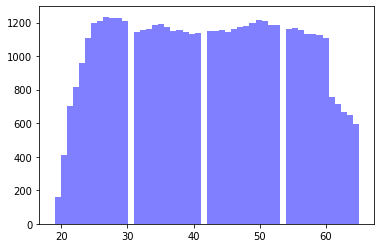

In [27]:
num_bins = 50
n, bins, patches = plt.hist(df.age, num_bins, facecolor='blue', alpha=0.5)

#### 5.B BoxPlot of Age

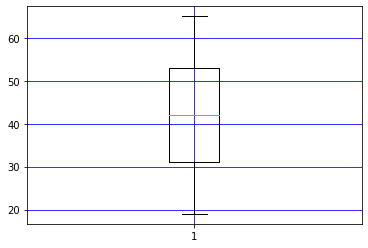

In [28]:
plt.boxplot(df.age)
plt.yscale('linear')
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.grid(b=True, which='minor', color='r', linestyle='--')
plt.show()

#### 5.C Scatterplot of age and length_of_service

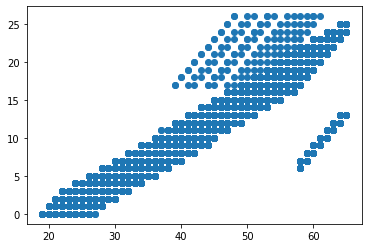

In [29]:
plt.scatter(df.age, df.length_of_service)
plt.show()

#### 5.D Plot Histogram of store_name

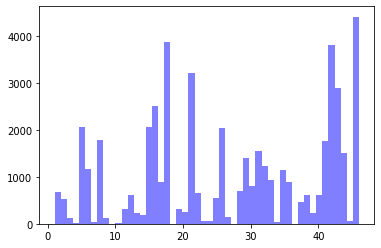

In [30]:
num_bins = 50
n, bins, patches = plt.hist(df.store_name, num_bins, facecolor='blue', alpha=0.5)

#### 5.E Print Statistical Summary of Age

In [31]:
print('statistical summary of observations =',stats.describe(df.age))

statistical summary of observations = DescribeResult(nobs=49653, minmax=(19, 65), mean=42.077034620264634, variance=154.4367264677654, skewness=0.023093117697645202, kurtosis=-1.1473302603578608)




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



